## Word Cloud NPS

Pasos para usar este archivo: 
*   Abrir la query https://data.shipnow.com.ar/question/3629-comentarios-word-cloud y se elije un rango de fechas de interes para analizar comentarios del NPS
*   Descargar archivo .csv de la query
*   Renombrar ese archivo como Word_Cloud.csv
*   Correr la celda de codigo que esta abajo apretando el boton de "play" que se encuenra aeeiba a la izquierda de la celda, o sino clickear en cualquier lugar de la celda de apretar las teclas "Ctrl"+"Enter"
*   Cuando comienze a funcionar el codigo te va a pedir que importes ese archivo csv a el colab
*   Como respuesta se van a descargar 4 archivos, 2 wordclouds y 2 archivos .csv. Los wordclouds tienen las palabras mas usadas por los comentarios positivos y negativos y los .csv correspondientes muestran los numeros exactos de cuanto es la frecuencia del uso de las palabras.


     |████████████████████████████████| 235 kB 9.4 MB/s 


Saving Word_Cloud.csv to Word_Cloud.csv
Hay 3261633 palabras en combinacion de todos los comentarios
Hay 556101 palabras en combinacion de todos los comentarios negativos, estos representan un 17 % del total
Hay 2705530 palabras en combinacion de todos los comentarios positivos , estos representan un 83 % del total


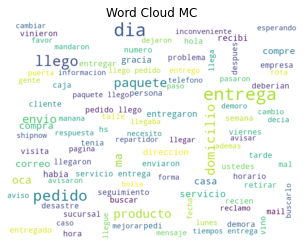

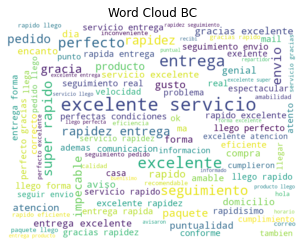

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Palabras,Frecuencia
0,excelente servicio,2543
1,entrega,1921
2,excelente,1863
3,perfecto,1428
4,super rapido,1376
...,...,...
13543,espana,1
13544,rapidisimi,1
13545,notificanfo,1
13546,ss,1


,Palabras,Frecuencia
0,dia,855
1,entrega,819
2,pedido,558
3,llego,542
4,domicilio,426
...,...,...
7028,entega,1
7029,activa,1
7030,xxx,1
7031,utiliza,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
!pip install unidecode

import matplotlib.pyplot as plt
import re
import unidecode
import warnings
import numpy as np
import pandas as pd
import wordcloud

from os import path
from PIL import Image
from google.colab import files
from wordcloud import WordCloud 

warnings.filterwarnings("ignore")
uploaded = files.upload()
df = pd.read_csv('Word_Cloud.csv')

df_malos_comentarios  = df.loc[df.Tipo_de_Comentario  == 'Mal Comentario']
df_buenos_comentarios = df.loc[df.Tipo_de_Comentario == 'Buen Comentario']

texto = " ".join(comentario for comentario in df.value)
texto_a_minusculas = texto.lower()
texto_sin_numeros = re.sub(r'\d+','',texto_a_minusculas)
texto_sin_simbolos = "".join(caracteres for caracteres in texto_sin_numeros if caracteres not in ("  ","   ","    ","     ","      ","       ","        ","         ","          ","?", ".", ";", ":", "!","\n","%",",","(",")",">","<",">","|","°",";","#","$","/","-","*","+","_","[","]","{","}","´","¨","¿","¡","'","=","&"))
texto_sin_acentos = unidecode.unidecode(texto_sin_simbolos)
texto = texto_sin_acentos.strip()

print ("Hay {} palabras en combinacion de todos los comentarios".format(len(texto)))

texto_MC = " ".join(comentario for comentario in df_malos_comentarios.value)
texto_a_minusculas = texto_MC.lower()
texto_sin_numeros = re.sub(r'\d+','',texto_a_minusculas)
texto_sin_simbolos = "".join(caracteres for caracteres in texto_sin_numeros if caracteres not in ("  ","   ","    ","     ","      ","       ","        ","         ","          ","?", ".", ";", ":", "!","\n","%",",","(",")",">","<",">","|","°",";","#","$","/","-","*","+","_","[","]","{","}","´","¨","¿","¡","'","=","&"))
texto_sin_acentos = unidecode.unidecode(texto_sin_simbolos)
texto_MC = texto_sin_acentos.strip()

print ("Hay {} palabras en combinacion de todos los comentarios negativos, estos representan un {} % del total".format(len(texto_MC),round((len(texto_MC)/len(texto))*100)))

texto_BC = " ".join(comentario for comentario in df_buenos_comentarios.value)
texto_a_minusculas = texto_BC.lower()
texto_sin_numeros = re.sub(r'\d+','',texto_a_minusculas)
texto_sin_simbolos = "".join(caracteres for caracteres in texto_sin_numeros if caracteres not in ("  ","   ","    ","     ","      ","       ","        ","         ","          ","?", ".", ";", ":", "!","\n","%",",","(",")",">","<",">","|","°",";","#","$","/","-","*","+","_","[","]","{","}","´","¨","¿","¡","'","=","&"))
texto_sin_acentos = unidecode.unidecode(texto_sin_simbolos)
texto_BC = texto_sin_acentos.strip()

print ("Hay {} palabras en combinacion de todos los comentarios positivos , estos representan un {} % del total".format(len(texto_BC),round((len(texto_BC)/len(texto))*100)))

stopwords = ["algún","alguna","algunas","alguno","algunos","ambos","ampleamos","ante","antes","aquel","aquellas","aquellos","aqui","arriba","atras","bajo","bastante","bien","cada","cierta","ciertas","cierto","ciertos","como","con","conseguimos","conseguir","consigo","consigue","consiguen","consigues","cual","cuando","dentro","desde","donde","dos","el","ellas","ellos","empleais","emplean","emplear","empleas","empleo","en","encima","entonces","entre","era","eramos","eran","eras","eres","es","esta","estaba","estado","estais","estamos","estan","estoy","fin","fue","fueron","fui","fuimos","gueno","ha","hace","haceis","hacemos","hacen","hacer","haces","hago","incluso","intenta","intentais","intentamos","intentan","intentar","intentas","intento","ir","la","largo","las","lo","los","mientras","mio","modo","muchos","muy","nos","nosotros","otro","para","pero","podeis","podemos","poder","podria","podriais","podriamos","podrian","podrias","por","por qué","porque","primero","puede","pueden","puedo","quien","sabe","sabeis","sabemos","saben","saber","sabes","ser","si","siendo","sin","sobre","sois","solamente","solo","somos","soy","su","sus","también","teneis","tenemos","tener","tengo","tiempo","tiene","tienen","todo","trabaja","trabajais","trabajamos","trabajan","trabajar","trabajas","trabajo","tras","tuyo","ultimo","un","una","unas","uno","unos","usa","usais","usamos","usan","usar","usas","uso","va","vais","valor","vamos","van","vaya","verdad","verdadera","VERDADERO","vosotras","vosotros","voy","yo","él","ésta","éstas","éste","éstos","última","últimas","último","últimos","a","añadió","aún","actualmente","adelante","además","afirmó","agregó","ahí","ahora","al","algo","alrededor","anterior","apenas","aproximadamente","aquí","así","aseguró","aunque","ayer","buen","buena","buenas","bueno","buenos","cómo","casi","cerca","cinco","comentó","conocer","consideró","considera","contra","cosas","creo","cuales","cualquier","cuanto","cuatro","cuenta","da","dado","dan","dar","de","debe","deben","debido","decir","dejó","del","demás","después","dice","dicen","dicho","dieron","diferente","diferentes","dijeron","dijo","dio","durante","e","ejemplo","ella","ello","embargo","encuentra","esa","esas","ese","eso","esos","está","están","estaban","estar","estará","estas","este","esto","estos","estuvo","ex","existe","existen","explicó","expresó","fuera","gran","grandes","había","habían","haber","habrá","hacerlo","hacia","haciendo","han","hasta","hay","haya","he","hecho","hemos","hicieron","hizo","hoy","hubo","igual","indicó","informó","junto","lado","le","les","llegó","lleva","llevar","luego","lugar","más","manera","manifestó","mayor","me","mediante","mejor","mencionó","menos","mi","misma","mismas","mismo","mismos","momento","mucha","muchas","mucho","nada","nadie","ni","ningún","ninguna","ningunas","ninguno","ningunos","no","nosotras","nuestra","nuestras","nuestro","nuestros","nueva","nuevas","nuevo","nuevos","nunca","o","ocho","otra","otras","otros","parece","parte","partir","pasada","pasado","pesar","poca","pocas","poco","pocos","podrá","podrán","podría","podrían","poner","posible","próximo","próximos","primer","primera","primeros","principalmente","propia","propias","propio","propios","pudo","pueda","pues","qué","que","quedó","queremos","quién","quienes","quiere","realizó","realizado","realizar","respecto","sí","sólo","se","señaló","sea","sean","según","segunda","segundo","seis","será","serán","sería","sido","siempre","siete","sigue","siguiente","sino","sola","solas","solos","son","tal","tampoco","tan","tanto","tenía","tendrá","tendrán","tenga","tenido","tercera","toda","todas","todavía","todos","total","trata","través","tres","tuvo","usted","varias","varios","veces","ver","vez","y","ya","te","tuve","asi","aun"]

wordcloud_MC = WordCloud(width=800, height=600, max_font_size=50, max_words=100,stopwords=stopwords, background_color="white")
wordcloud_MC.generate_from_frequencies(wordcloud_MC.process_text(texto_MC))

wordcloud_BC = WordCloud(width=800, height=600, max_font_size=50, max_words=100,stopwords=stopwords, background_color="white")
wordcloud_BC.generate_from_frequencies(wordcloud_BC.process_text(texto_BC))

# Display the generated image:
plt.imshow(wordcloud_MC, interpolation='bilinear')
plt.title("Word Cloud MC")
plt.axis("off")
plt.show()
wordcloud_MC.to_file("wordcloud_MC.jpg")

plt.imshow(wordcloud_BC, interpolation='bilinear')
plt.title("Word Cloud BC")
plt.axis("off")
plt.show()
wordcloud_BC.to_file("wordcloud_BC.jpg")

files.download("wordcloud_MC.jpg")
files.download("wordcloud_BC.jpg")


# Display the generated frequencys DB:
frecuencia_palabras_BC = list(wordcloud_BC.process_text(texto_BC).items())
df_frecuencia_BC = pd.DataFrame (frecuencia_palabras_BC, columns=['Palabras','Frecuencia'])
df_frecuencia_BC = df_frecuencia_BC.sort_values(by=['Frecuencia'], ascending=False)
df_frecuencia_BC = df_frecuencia_BC.reset_index(drop=True)

display(df_frecuencia_BC)

frecuencia_palabras_MC = list(wordcloud_MC.process_text(texto_MC).items())
df_frecuencia_MC = pd.DataFrame (frecuencia_palabras_MC, columns=['Palabras','Frecuencia'])
df_frecuencia_MC = df_frecuencia_MC.sort_values(by=['Frecuencia'], ascending=False)
df_frecuencia_MC = df_frecuencia_MC.reset_index(drop=True)

display(df_frecuencia_MC)

df_frecuencia_BC.to_csv("df_frecuencia_BC.csv")
df_frecuencia_MC.to_csv("df_frecuencia_MC.csv")

files.download("df_frecuencia_BC.csv")
files.download("df_frecuencia_MC.csv")